In [1]:
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
import matplotlib as plt
%matplotlib inline
ox.__version__

useful_tags_path = ['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name',
                    'highway', 'maxspeed', 'service', 'access', 'area',
                    'landuse', 'width', 'est_width', 'junction', 'traffic_signals']
ox.utils.config(useful_tags_path)

# define the colors to use for different edge types
hwy_colors = {
        'motorway': 'purple',
        'trunk': 'pink',
        'primary': 'green',
        'secondary': 'yellow',
        'tertiary': 'orange',
        'unclassified': 'blue',
        'residential': 'red',
        # 'cycleway': 'skyblue',
        # 'service': 'sienna',
        # 'living street': 'lightgreen',
        # 'pedestrian': 'lightskyblue',
    }


# return edge IDs that do not match passed list of hwys
def find_edges(G, hwys):
    edges = []
    for u, v, k, data in G.edges(keys=True, data='highway'):
        check1 = isinstance(data, str) and data not in hwys
        check2 = isinstance(data, list) and all([d not in hwys for d in data])
        if check1 or check2:
            edges.append((u, v, k))
    return set(edges)


/Users/khalid-alsheeb/opt/anaconda3/envs/kurf/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
# you can get networks anywhere in the world
#address = "Mayfair, London, England, UK"
#address = 'Doha, Qatar'
#address = 'Manhattan, new york'
#address = 'Los Angeles, California'
address = '30 Aldwych, London WC2B 4BG'
#G = ox.graph_from_address(address, network_type="drive", dist=2000)
G = ox.graph_from_address(address, network_type="drive")
print(len(G.edges()))
#G = ox.graph_from_address(address, network_type="drive", dist=2000) #400 edges, 1300 roads
#G = ox.graph_from_address(address, network_type="drive", dist=3000) #8k ..., 2.8k ...

#G = ox.graph_from_address(address, network_type="drive")

#G = ox.graph_from_place("Qatar", network_type="drive")



934


In [27]:
s = 1881001588
t = 107734
attributes = G.get_edge_data(t, s).items()
# attributes = G[t][s][0]
attributes

dict_items([(0, {'osmid': [200596577, 224637155, 948685543, 948685544, 670348489, 23013971, 4253331], 'oneway': 'yes', 'lanes': ['1', '2'], 'ref': 'A301', 'name': 'Waterloo Bridge', 'highway': 'primary', 'maxspeed': '20 mph', 'reversed': False, 'length': 526.339, 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x14dd1ef80>})])

In [33]:
reverse_edge(G, t, s)

In [36]:
G[s][t]

AtlasView({0: {'osmid': [200596577, 224637155, 948685543, 948685544, 670348489, 23013971, 4253331], 'oneway': 'yes', 'lanes': ['1', '2'], 'ref': 'A301', 'name': 'Waterloo Bridge', 'highway': 'primary', 'maxspeed': '20 mph', 'reversed': False, 'length': 526.339, 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x1509bcb50>}})

In [28]:
G.add_edge(s, t, attributes)

G[s][t]

SyntaxError: positional argument follows keyword argument (2443793037.py, line 1)

In [6]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [3]:
nodes, edges = ox.graph_to_gdfs(G)

In [4]:
edges[edges.name == '']

Empty GeoDataFrame
Columns: [osmid, oneway, name, highway, maxspeed, reversed, length, geometry, lanes, ref, tunnel, access, junction, bridge]
Index: []

In [15]:
for i in range(len(edges.index)):
    z = edges.index[i][2]
    if z != 0:
        print(i)

126
317
468


In [17]:
edges.iloc[126]

osmid       [68883404, 68883406, 68883407, 68883408, 42541...
oneway                                                    yes
name            [Robert Street, Adam Street, Adelphi Terrace]
highway                                           residential
maxspeed                                               20 mph
reversed                                                False
length                                                201.298
geometry    LINESTRING (-0.1221066 51.5095536, -0.1215802 ...
lanes                                                     NaN
ref                                                       NaN
tunnel                                                    NaN
access                                                    NaN
junction                                                  NaN
bridge                                                    NaN
Name: (9515377, 2975783588, 1), dtype: object

In [18]:
edges.iloc[125]

osmid                                                 4254108
oneway                                                    NaN
name                                         John Adam Street
highway                                           residential
maxspeed                                               20 mph
reversed                                                False
length                                                 72.995
geometry    LINESTRING (-0.1221066 51.5095536, -0.1229455 ...
lanes                                                     NaN
ref                                                       NaN
tunnel                                                    NaN
access                                                    NaN
junction                                                  NaN
bridge                                                    NaN
Name: (9515377, 2975783588, 0), dtype: object

In [5]:
points = nodes.geometry

In [6]:
points

osmid
104302        POINT (-0.13033 51.52037)
104312        POINT (-0.11332 51.52151)
104315        POINT (-0.11138 51.51818)
107668        POINT (-0.10326 51.51206)
107686        POINT (-0.10354 51.51415)
                        ...            
9522806805    POINT (-0.12590 51.51236)
9526047354    POINT (-0.12195 51.51232)
9576767098    POINT (-0.12094 51.51622)
9620045688    POINT (-0.11734 51.51457)
9846850974    POINT (-0.10367 51.51813)
Name: geometry, Length: 692, dtype: geometry

In [ ]:
edges[edges['length'] == np.nan]

In [ ]:
#Geo.loc[Geo.highway == 'traffic_signals']
edges['maxspeed'].value_counts()

In [ ]:
type(edges['length'].iloc[0])

In [ ]:
# G2 = ox.add_edge_speeds(G)
# G2 = ox.add_edge_travel_times(G2)
# #G2 = ox.add_node_elevations() Needs google API

# #list(G2.edges())
# #list(G2.edges(data=True)) To get edges data

# nodes, edges = ox.graph_to_gdfs(G2) #retursn a geodataFrame (nodes and edges data (just like a pandas dataframe))



In [ ]:
print(len(edges))
print(len(edges['name'].value_counts()))

In [ ]:
# #nodes.loc[nodes.index == 21651906]
# nodes
# #nodes.loc[nodes.highway == 'traffic_signals']
# edges


# #GeoGraph = ox.graph_from_gdfs(Geo, edges)
# ox.plot_graph_folium(G2)

# nodes

In [ ]:
# #print(len(nodes), len(Geo))

# len(nodes.loc[nodes.highway == 'traffic_signals'])

# # print(nodes['highway'].value_counts())

# # print(Geo['highway'].value_counts())

# # Geo
# #Geo
# list(edges.iloc[0].geometry.coords)
# #edges.iloc[0]

In [ ]:
#pd.merge(nodes, Geo, on=['geometry'], how='inner')

In [ ]:
edges.name = (edges.name).astype(str)

In [ ]:
names = edges.name.unique()

In [ ]:
notFoundCounter = 0
for name in names:
    if edges.loc[edges['name'] == name]['lanes'].isnull().all():
        notFoundCounter += 1

In [ ]:
print('percentage  of road missing number of lanes = ', notFoundCounter / len(names) * 100)

In [ ]:
print('percentage of edges missing number of lanes = ', edges['lanes'].isnull().sum() / len(edges) * 100)

In [ ]:
notFoundCounter = 0
for name in names:
    if edges.loc[edges['name'] == name]['oneway'].isnull().all():
        notFoundCounter += 1

In [ ]:
print('percentage  of road missing number of lanes = ', notFoundCounter / len(names) * 100)

In [ ]:
edges.loc[edges['name'] == 'Hallam Street']['lanes'].isnull().all()

In [ ]:
edges.loc[edges['name'] == 'Hallam Street']['oneway']#.isnull().all()

In [ ]:
edges.lanes.value_counts()

In [17]:

# longitude = str(coordinates[0])
# latitude = str(coordinates[1])

In [ ]:
G = ox.graph_from_gdfs(nodes, edges)

In [19]:
m = ox.plot_graph_folium(G)
# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='name',
                                 weight=5,
                                 color=color)
        
m


In [3]:

m = ox.plot_graph_folium(G, anotate=True)
# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='maxspeed',
                                 weight=5,
                                 color=color)
        
m


In [ ]:
desired_path = [25632859, 25632864, 25632855,1771426174]#, 20965803, 6369329166, 20965799, 2398924898, 1360122917, 104318, 7946372941, 1684437690, 1810130458, 1832129873, 5265953459, 5265953457, 5265953455, 6724775018, 2453947049, 4211515634, 104315, 25496762, 108903, 25503707, 108902, 973525136, 6060084833, 108901, 107830, 455705625, 1104473061, 1104473062, 107863, 107864, 107865, 11863161, 107999, 107992, 107987, 107990, 107989, 107995, 108021, 108012, 108043, 8253496132, 1685267218, 1685267214, 1685267212]

In [ ]:
ox.plot_graph(G, anotate=True)

In [ ]:
# fig, ax = ox.plot_graph(G, edge_linewidth=3, node_size=0, show=False, close=False)
# for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
#     text = edge['name']
#     c = edge['geometry'].centroid
#     ax.annotate(text, (c.x, c.y), c='y')
# plt.show()

In [ ]:
sp = nx.shortest_path(G, source=desired_path[0], target=desired_path[-1], weight="weight")

In [ ]:
sp

In [ ]:
dp1 = nx.shortest_path(G, source=desired_path[0], target=107836, weight="weight")[:-1]
dp2 = nx.shortest_path(G, source=107836, target=desired_path[-1], weight="weight")
dp = dp1 + dp2

In [ ]:
ox.plot.plot_graph_route(G, dp)

In [ ]:
ox.plot.plot_graph_route(G, sp)

In [ ]:
desired_path = [25632859, 25632864, 25632855, 1771426174, 20965803, 6369329166, 20965799, 2398924898, 1360122917, 104318, 25509527, 109408, 107686, 237908, 1707790076, 21392273, 1955520890, 1707790067, 5177397824, 5177397822, 5177397828, 5177397825, 5177397823, 4034060017, 1955520879, 4421008566, 4421008555, 4879371166, 21392089, 1678452727, 25472326, 3933712866, 12237913, 340301586, 353282071, 340301595, 25496662, 24923172, 24923171, 25496763, 24923170, 24923169, 25498692, 629543834, 276518, 25498699, 25498271, 25498986, 276507, 25498991, 25498992, 60007208, 25499003, 6388417653, 1039761165, 6638565967, 1039761165, 6388417653, 25499003, 60007208, 25498992, 25498991, 276507, 25498986, 25498271, 25498699, 276518, 629543834, 1827316588, 1827316591, 9226543139, 1827316587, 1827316597, 1827316593, 1827316595, 2450730393, 364280, 25499046, 24923325, 25499047, 24923328, 4099667494, 33673001, 364282, 2623963014, 5245754267, 2512310242, 266325426, 266325461, 25510321, 2623975694, 25472893, 6277683849, 32925453, 107738, 107733, 107734, 1881001588, 455705618, 455705622, 21590630, 9054849009, 5986763688, 107830, 455705625, 1104473061, 1104473062, 107863, 107864, 107865, 11863161, 107881, 4777961335, 1953893735, 107986, 107996, 3175297197, 110098, 110104, 10365726, 5124892577, 108021, 108012, 108043, 8253496132, 1685267218, 1685267214, 1685267212]

In [ ]:
ox.plot.plot_graph_route(G, desired_path)

In [ ]:
fig, ax = ox.plot_graph(G)

In [121]:
G2 = G.copy()
keep = list(G2.edges())[:500]

remove = []

for u, v in G2.edges():
    if (u, v) not in keep:
        remove.append((u, v))

G2.remove_edges_from(remove)
G2.remove_nodes_from(list(nx.isolates(G2)))

In [122]:


#107989 107987 107839

In [123]:
dp = nx.shortest_path(G2, source=107989, target=107987, weight="weight")[:-1] + nx.shortest_path(G2, source=107987, target=107839, weight="weight")

In [124]:
dp

[107989,
 107988,
 107987,
 107990,
 107991,
 107992,
 107999,
 11863161,
 107865,
 107864,
 1843345666,
 107839]

In [125]:
sp = nx.shortest_path(G2, source=107989, target=107839, weight="weight")

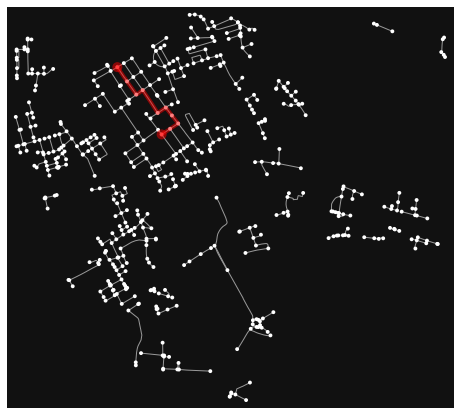

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [126]:
ox.plot.plot_graph_route(G2, sp)

In [162]:
desired_path = nx.shortest_path(G, source=107992, target=107987, weight="weight")[:-1] + nx.shortest_path(G, source=107987, target=107839, weight="weight")

NodeNotFound: Either source 107992 or target 107987 is not in G

In [183]:
import random
s = random.choice(list(G.nodes()))
m = random.choice(list(G.nodes()))
t = random.choice(list(G.nodes()))
print(s, m, t)

#1617596714 256794594 1707790024

25504190 256794594 4166662878


In [185]:
nx.shortest_path(G, source=1617596714, target=256794594, weight="weight")

[1617596714,
 1617647945,
 107693,
 5006063176,
 5006063180,
 33141178,
 10572786,
 10572785,
 108903,
 25503707,
 108902,
 973525136,
 6060084833,
 108901,
 107830,
 25472758,
 25470679,
 107829,
 456363903,
 1614949613,
 4356572311,
 6940326498,
 26848680,
 26699561,
 5630841552,
 4356572322,
 1616122237,
 1616122178,
 1616122145,
 21554364,
 25496899,
 2476787985,
 9522532106,
 5932959891,
 1678452778,
 1614846683,
 1106056861,
 9515387,
 256794593,
 256794594]

TypeError: 'NoneType' object is not subscriptable

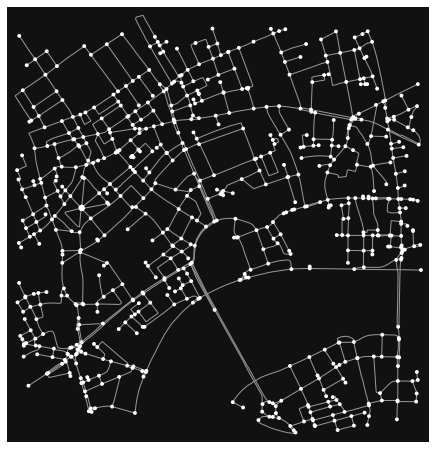

In [182]:
ox.plot.plot_graph_route(G, dp)

In [115]:
m = ox.plot_graph_folium(G2, anotate=True)
# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G2.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='name',
                                 weight=5,
                                 color=color)
        
m

In [ ]:
ox.plot.plot_graph_route(G2, sp)

In [ ]:
fig, ax = ox.plot_graph(G2)

In [ ]:
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.1)

In [ ]:
for i in set([1, 2, 3, 4, 3, 2]):
    print(i)